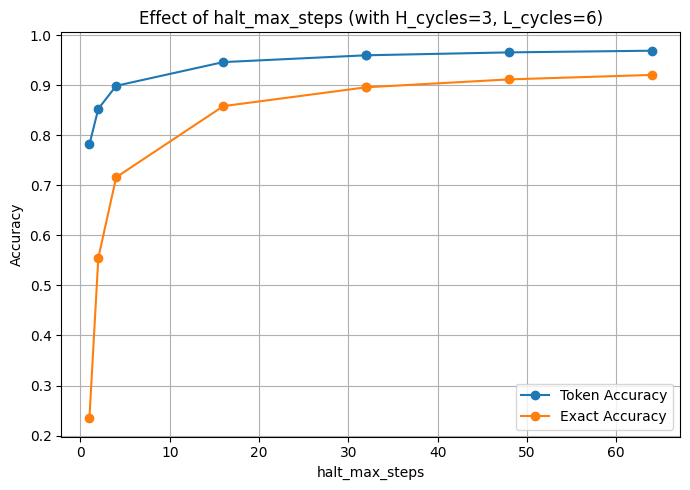

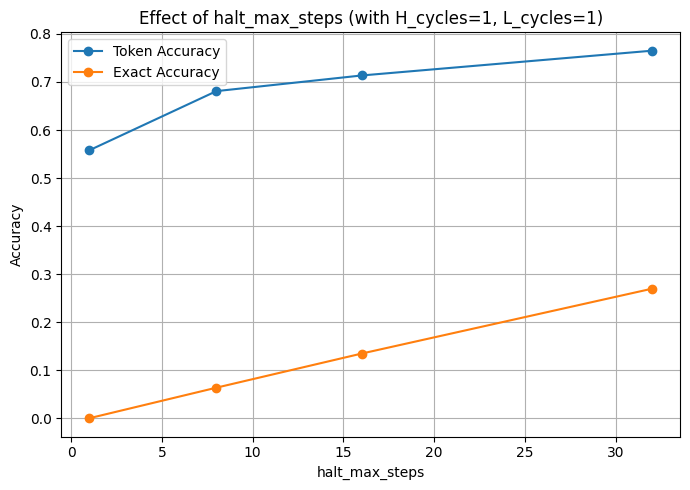

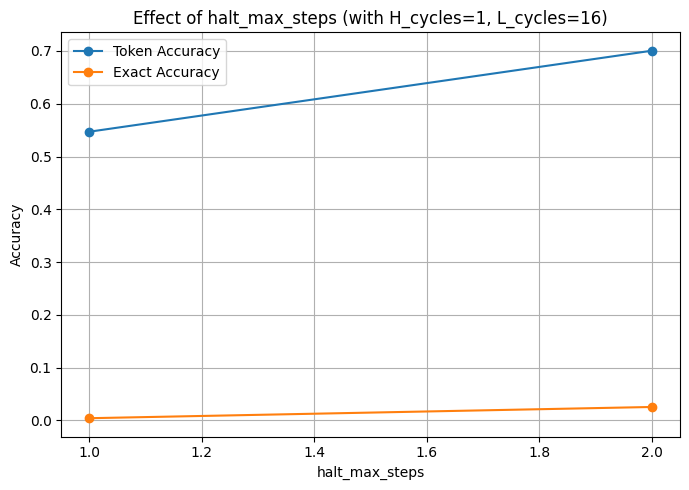

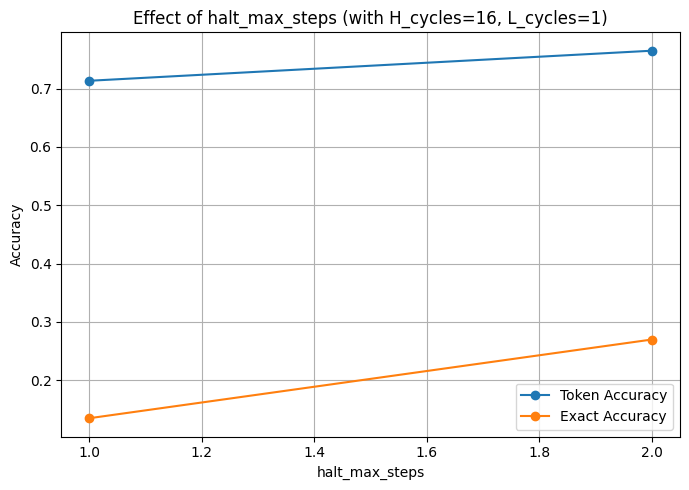

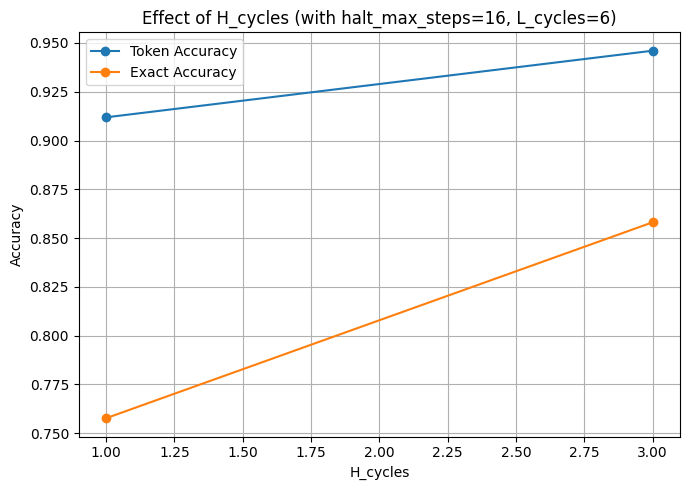

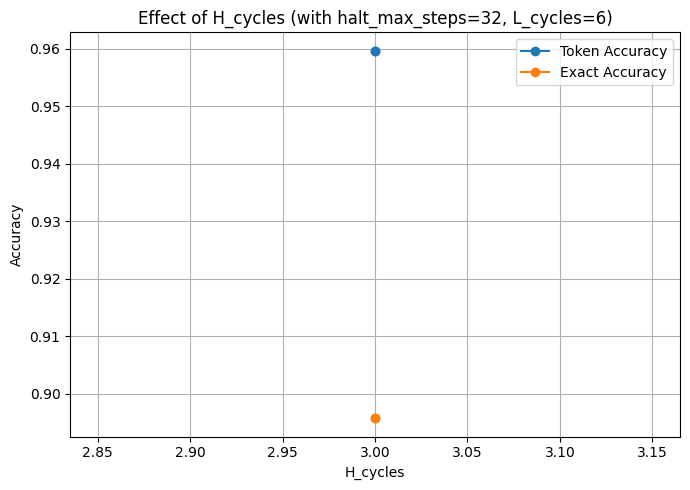

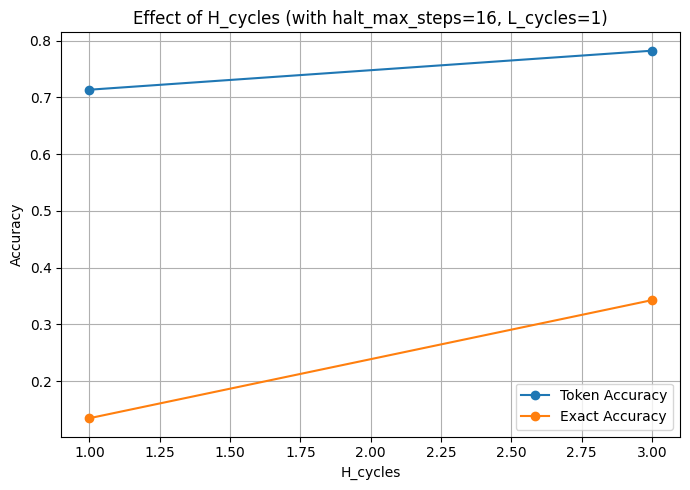

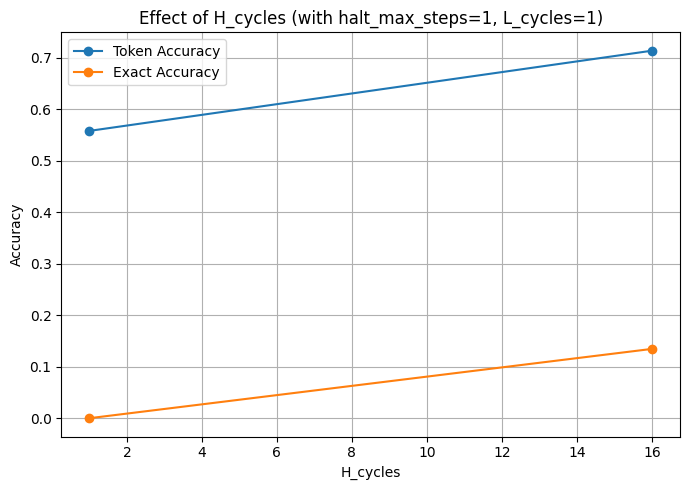

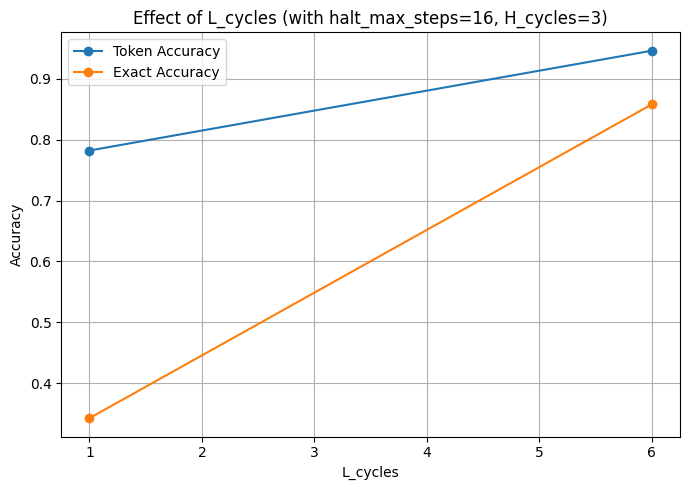

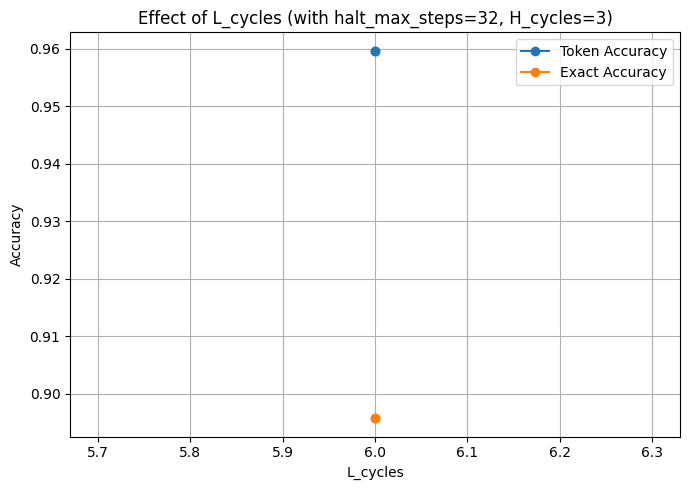

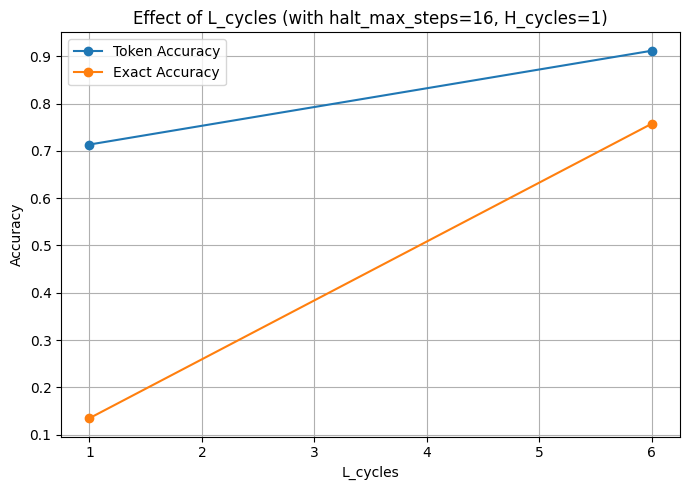

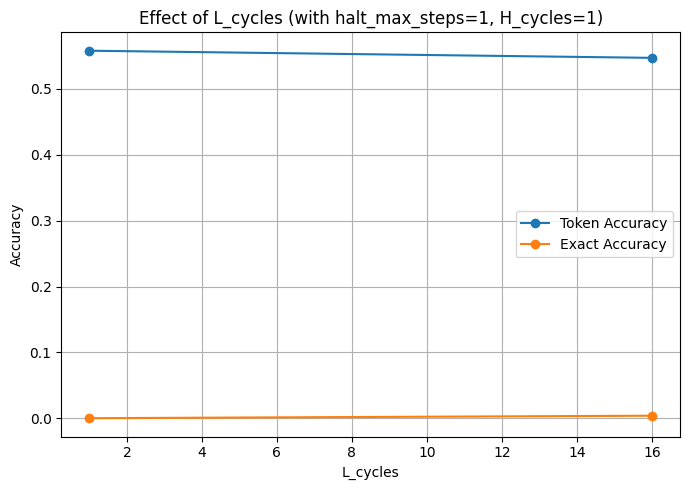

In [ ]:
import json
import matplotlib.pyplot as plt

def plot_scenario(results, varying_param, fixed_params):
    """
    results: list of dicts loaded from JSON
    varying_param: string, the hyperparameter to vary
    fixed_params: dict, e.g. {"H_cycles": 3, "L_cycles": 6}
    """
    
    # --- Filter results matching fixed parameters ---
    filtered = []
    for r in results:
        cfg = r["config"]
        if all(cfg.get(k) == v for k, v in fixed_params.items()):
            filtered.append(r)

    if len(filtered) <= 1:
        print("Not enough results for scenario:", fixed_params)
        return
    
    # --- Sort by varying parameter ---
    filtered = sorted(filtered, key=lambda x: x["config"][varying_param])
    
    x = [r["config"][varying_param] for r in filtered]
    token_acc = [r["token_accuracy"] for r in filtered]
    exact_acc = [r["exact_accuracy"] for r in filtered]

    # --- Plot ---
    title_fixed = ", ".join([f"{k}={v}" for k, v in fixed_params.items()])
    plt.figure(figsize=(7,5))
    plt.plot(x, token_acc, marker="o", label="Token Accuracy")
    plt.plot(x, exact_acc, marker="o", label="Exact Accuracy")

    plt.xlabel(varying_param)
    plt.ylabel("Accuracy")
    plt.title(f"Effect of {varying_param} ({title_fixed})")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()